In [ ]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

In [ ]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [ ]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)
q = p.line(x, y, color="red", line_width=3)

In [ ]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    q.data_source.data['y'] = A * func(2*w * x + phi)
    push_notebook()

In [ ]:
show(p, notebook_handle=True)

In [ ]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

In [ ]:
show(p, notebook_handle=True)
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

In [ ]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py

import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    

<h1>Python notebook to read atmospheric and soil data</h1>

This notebook uses openpyxl and pandas library

In [2]:
import pandas as pd
from pandas import Series

# sensor1 = pd.read_csv("Feb-data/SN201465412018-02-1715_41_29-0500.csv",
#                       squeeze=True,
#                       parse_dates=[0],
#                       index_col=[0],
#                       usecols = [0,1],
#                       skip_blank_lines=True)
sensor1 = pd.read_csv("Feb-data/SN201465412018-02-1715_41_29-0500.csv",
                      squeeze=True,
                      parse_dates=[0],
                      index_col=[0],
                      header = 1,
                      skip_blank_lines=True,
                      names = ["probe1", "probe2"])
# sensor2 = pd.read_csv("Feb-data/SN201465412018-02-1715_41_29-0500.csv",
#                       squeeze=True,
#                       parse_dates=[0],
#                       index_col=[0],
#                       usecols = [0,2],
#                       skip_blank_lines=True)
# sensor2 = pd.read_csv("Feb-data/SN 20146541 2018-02-17 15_41_29 -0500.csv",
#                   header = 1, parse_dates=[0],index_col=0
#                    , usecols = [0,2])


In [3]:
sensor1 = sensor1.dropna()
sensor1.dtypes
sensor1.loc[sensor1.probe1 == " "] = -1.0
sensor1.loc[sensor1.probe2 == " "] = -1.0

In [4]:
sensor1[['probe1']] = sensor1[['probe1']].apply(pd.to_numeric)
sensor1[['probe2']] = sensor1[['probe2']].apply(pd.to_numeric)
sensor1.dtypes

probe1    float64
probe2    float64
dtype: object

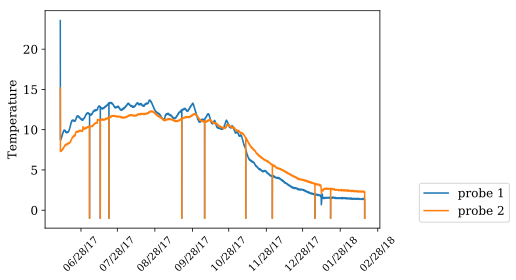

In [34]:
from matplotlib.dates import WEEKLY, MONTHLY, DAILY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime
from scipy.constants import convert_temperature
# print(T)
rule = rrulewrapper(MONTHLY)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
fig, ax = plt.subplots()
plt.plot(sensor1.index,sensor1[['probe1']], label = "probe 1")
plt.plot(sensor1.index,sensor1[['probe2']], label = "probe 2")
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10)
plt.ylabel(r"Temperature")
plt.legend(loc=3, bbox_to_anchor=[1.1, 0.], ncol=1, shadow=False, fancybox=True)
plt.show()

In [33]:
N = sensor1.probe1.size
print(type(N))
sensor1.probe1[2]

<class 'int'>


9.01

In [36]:
i = 0
while i <= N-1:
    if sensor1.probe1[i] == -1.0:
        if i == N-1:
            ip = i-1
            im = i-2
        else:
            im = i-1
            ip = i
            while sensor1.probe1[ip] == -1.0 and ip < N:
                ip += 1
            if ip == N:
                ip = i-1
                im = i-2
        yp = sensor1.probe1[ip]
        ym = sensor1.probe1[im]
        sensor1.probe1[i] = ym + (i-im)*(yp-ym)/(ip-im)
    i += 1

In [38]:
i = 0
while i <= N-1:
    if sensor1.probe2[i] == -1.0:
        if i == N-1:
            ip = i-1
            im = i-2
        else:
            im = i-1
            ip = i
            while sensor1.probe2[ip] == -1.0 and ip < N:
                ip += 1
            if ip == N:
                ip = i-1
                im = i-2
        yp = sensor1.probe2[ip]
        ym = sensor1.probe2[im]
        sensor1.probe2[i] = ym + (i-im)*(yp-ym)/(ip-im)
    i += 1

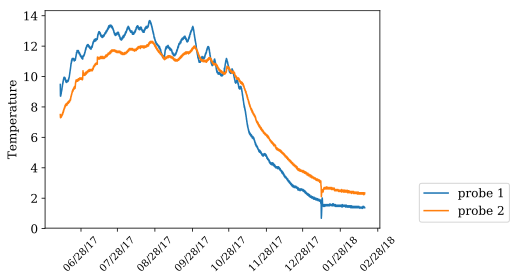

In [44]:
rule = rrulewrapper(MONTHLY)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
fig, ax = plt.subplots()
plt.plot(sensor1.index[1:],sensor1.probe1[1:], label = "probe 1")
plt.plot(sensor1.index[1:],sensor1.probe2[1:], label = "probe 2")
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10)
plt.ylabel(r"Temperature")
plt.legend(loc=3, bbox_to_anchor=[1.1, 0.], ncol=1, shadow=False, fancybox=True)
plt.show()

In [ ]:
rows = atmlog.max_row
print(rows)
columns = atmlog.max_column
print(columns)

T_air = []
date_air = []
i = 0
for rowOfCellObjects in atmlog['I2':'I'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_air.append(cellObj.value)
for rowOfCellObjects in atmlog['A2':'A'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        date_air.append(cellObj.value)



In [ ]:
rows = soil1.max_row
print(rows)
columns = soil1.max_column
print(columns)

T_soil1_1 = []
T_soil1_2 = []
date_soil1 = []
i = 0
for rowOfCellObjects in soil1['C4':'C'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil1_1.append(cellObj.value)
for rowOfCellObjects in soil1['D4':'D'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil1_2.append(cellObj.value)
for rowOfCellObjects in soil1['B4':'B'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        date_soil1.append(cellObj.value)

rows = soil2.max_row
print(rows)
columns = soil2.max_column
print(columns)

T_soil2_1 = []
T_soil2_2 = []
date_soil2 = []
i = 0
for rowOfCellObjects in soil2['C4':'C'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil2_1.append(cellObj.value)
for rowOfCellObjects in soil2['D4':'D'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil2_2.append(cellObj.value)
for rowOfCellObjects in soil2['B4':'B'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        date_soil2.append(cellObj.value)

rows = soil3.max_row
print(rows)
columns = soil3.max_column
print(columns)

T_soil3_1 = []
T_soil3_2 = []
date_soil3 = []
i = 0
for rowOfCellObjects in soil3['C4':'C'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil3_1.append(cellObj.value)
for rowOfCellObjects in soil3['D4':'D'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil3_2.append(cellObj.value)
for rowOfCellObjects in soil3['B4':'B'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        date_soil3.append(cellObj.value)

rows = soil4.max_row
print(rows)
columns = soil4.max_column
print(columns)

T_soil4_1 = []
T_soil4_2 = []
date_soil4 = []
i = 0
for rowOfCellObjects in soil4['C4':'C'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil4_1.append(cellObj.value)
for rowOfCellObjects in soil4['D4':'D'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        T_soil4_2.append(cellObj.value)
for rowOfCellObjects in soil4['B4':'B'+str(rows)]:
    for cellObj in rowOfCellObjects:
#         print(cellObj.coordinate, cellObj.value)
        date_soil4.append(cellObj.value)



In [ ]:
from matplotlib.dates import WEEKLY, MONTHLY, DAILY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime
from scipy.constants import convert_temperature
# print(T)
T_air_interp = np.asarray(T_air)
mask = (T_air_interp == np.array(None))
mask2 = (T_air_interp == np.array(np.NaN))
# Tmask = np.where(T_C == None)
T_air_interp[mask] = 0.
for i in range(len(T_air_interp)):
    if mask[i] or mask2[i]:
        T_air_interp[i] = T_air_interp[i-1] # not the best way to fill the missing data, will code interpolation later
T_air_interp = convert_temperature(T_air_interp,'Fahrenheit','Celsius')
# print(T_C)
rule = rrulewrapper(WEEKLY)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

T_soil1_1 = np.asarray(T_soil1_1)
T_soil1_2 = np.asarray(T_soil1_2)

T_soil2_1 = np.asarray(T_soil2_1)
T_soil2_2 = np.asarray(T_soil2_2)

T_soil3_1 = np.asarray(T_soil3_1)
T_soil3_2 = np.asarray(T_soil3_2)

T_soil4_1 = np.asarray(T_soil4_1)
T_soil4_2 = np.asarray(T_soil4_2)
print(T_soil1_1.shape)


# plt.plot(T_air_interp)

In [ ]:

fig, ax = plt.subplots()
plt.plot(date_air, T_air_interp, label = r"air")
plt.plot(date_soil1,T_soil1_1, label = r"Soil 1 probe 1")
plt.plot(date_soil1,T_soil1_2, label = r"Soil 1 probe 2")
plt.plot(date_soil2,T_soil2_1, label = r"Soil 2 probe 1")
plt.plot(date_soil2,T_soil2_2, label = r"Soil 2 probe 2")
plt.plot(date_soil3,T_soil3_1, label = r"Soil 3 probe 1")
plt.plot(date_soil3,T_soil3_2, label = r"Soil 3 probe 2")
plt.plot(date_soil4,T_soil4_1, label = r"Soil 4 probe 1")
plt.plot(date_soil4,T_soil4_2, label = r"Soil 4 probe 2")
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10)
plt.ylabel(r"Temperature")
plt.legend(loc=3, bbox_to_anchor=[1.01, 0.], ncol=2, shadow=False, fancybox=True)
plt.show()

In [ ]:
# Hourly averages
import pandas as pd

# Create an empty dataframe
df_air = pd.DataFrame()

# Create a column from the datetime variable
df_air['datetime'] = date_air
# Convert that column into a datetime datatype
df_air['datetime'] = pd.to_datetime(df_air['datetime'])
# Set the datetime column as the index
df_air.index = df_air['datetime'] 
# Create a column from the numeric score variable
df_air['temperature'] = T_air_interp

df_air['temperature'] = df_air['temperature'].astype(float)
df_air.resample('D').mean()


In [ ]:
# Hourly averages
import pandas as pd

# Create an empty dataframe
df_soil1_1 = pd.DataFrame()
df_soil1_2 = pd.DataFrame()
# Create a column from the datetime variable
df_soil1_1['datetime'] = date_soil1
df_soil1_2['datetime'] = date_soil1
# Convert that column into a datetime datatype
df_soil1_1['datetime'] = pd.to_datetime(df_soil1_1['datetime'])
df_soil1_2['datetime'] = pd.to_datetime(df_soil1_2['datetime'])
# Set the datetime column as the index
df_soil1_1.index = df_soil1_1['datetime'] 
df_soil1_2.index = df_soil1_2['datetime'] 
# Create a column from the numeric score variable
df_soil1_1['temperature'] = T_soil1_1
df_soil1_2['temperature'] = T_soil1_2

df_soil1_1['temperature'] = df_soil1_1['temperature'].astype(float)
df_soil1_2['temperature'] = df_soil1_2['temperature'].astype(float)
df_soil1_1.resample('D').mean()


# Create an empty dataframe
df_soil2_1 = pd.DataFrame()
df_soil2_2 = pd.DataFrame()
# Create a column from the datetime variable
df_soil2_1['datetime'] = date_soil2
df_soil2_2['datetime'] = date_soil2
# Convert that column into a datetime datatype
df_soil2_1['datetime'] = pd.to_datetime(df_soil2_1['datetime'])
df_soil2_2['datetime'] = pd.to_datetime(df_soil2_2['datetime'])
# Set the datetime column as the index
df_soil2_1.index = df_soil2_1['datetime'] 
df_soil2_2.index = df_soil2_2['datetime'] 
# Create a column from the numeric score variable
df_soil2_1['temperature'] = T_soil2_1
df_soil2_2['temperature'] = T_soil2_2

df_soil2_1['temperature'] = df_soil2_1['temperature'].astype(float)
df_soil2_2['temperature'] = df_soil2_2['temperature'].astype(float)


# Create an empty dataframe
df_soil3_1 = pd.DataFrame()
df_soil3_2 = pd.DataFrame()
# Create a column from the datetime variable
df_soil3_1['datetime'] = date_soil3
df_soil3_2['datetime'] = date_soil3
# Convert that column into a datetime datatype
df_soil3_1['datetime'] = pd.to_datetime(df_soil3_1['datetime'])
df_soil3_2['datetime'] = pd.to_datetime(df_soil3_2['datetime'])
# Set the datetime column as the index
df_soil3_1.index = df_soil3_1['datetime'] 
df_soil3_2.index = df_soil3_2['datetime'] 
# Create a column from the numeric score variable
df_soil3_1['temperature'] = T_soil3_1
df_soil3_2['temperature'] = T_soil3_2

df_soil3_1['temperature'] = df_soil3_1['temperature'].astype(float)
df_soil3_2['temperature'] = df_soil3_2['temperature'].astype(float)


# Create an empty dataframe
df_soil4_1 = pd.DataFrame()
df_soil4_2 = pd.DataFrame()
# Create a column from the datetime variable
df_soil4_1['datetime'] = date_soil4
df_soil4_2['datetime'] = date_soil4
# Convert that column into a datetime datatype
df_soil4_1['datetime'] = pd.to_datetime(df_soil4_1['datetime'])
df_soil4_2['datetime'] = pd.to_datetime(df_soil4_2['datetime'])
# Set the datetime column as the index
df_soil4_1.index = df_soil4_1['datetime'] 
df_soil4_2.index = df_soil4_2['datetime'] 
# Create a column from the numeric score variable
df_soil4_1['temperature'] = T_soil4_1
df_soil4_2['temperature'] = T_soil4_2

df_soil4_1['temperature'] = df_soil4_1['temperature'].astype(float)
df_soil4_2['temperature'] = df_soil4_2['temperature'].astype(float)


The cell below plots the temperature profiles averaged over a given period. 'H' or '1H' gives hourly mean, 'D' daily, 'W' weekly and 'M' monthly. '6H' gives 6 hour average.

In [ ]:
down_sampling = 'D'
dsample_air = pd.DataFrame()
dsample_air['temperature'] = df_air.temperature.resample(down_sampling).mean()
dsample_soil1_1 = pd.DataFrame()
dsample_soil1_1['temperature'] = df_soil1_1.temperature.resample(down_sampling).mean()
dsample_soil1_2 = pd.DataFrame()
dsample_soil1_2['temperature'] = df_soil1_2.temperature.resample(down_sampling).mean()
dsample_soil2_1 = pd.DataFrame()
dsample_soil2_1['temperature'] = df_soil2_1.temperature.resample(down_sampling).mean()
dsample_soil2_2 = pd.DataFrame()
dsample_soil2_2['temperature'] = df_soil2_2.temperature.resample(down_sampling).mean()
dsample_soil3_1 = pd.DataFrame()
dsample_soil3_1['temperature'] = df_soil3_1.temperature.resample(down_sampling).mean()
dsample_soil3_2 = pd.DataFrame()
dsample_soil3_2['temperature'] = df_soil3_2.temperature.resample(down_sampling).mean()
dsample_soil4_1 = pd.DataFrame()
dsample_soil4_1['temperature'] = df_soil4_1.temperature.resample(down_sampling).mean()
dsample_soil4_2 = pd.DataFrame()
dsample_soil4_2['temperature'] = df_soil4_2.temperature.resample(down_sampling).mean()

fig, ax = plt.subplots()
plt.plot(dsample_air.index, dsample_air['temperature'], 'k', label = r"air")
plt.plot(dsample_soil1_1.index, dsample_soil1_1['temperature'], 'C0-', label = r"soil 1 1")
plt.plot(dsample_soil1_2.index, dsample_soil1_2['temperature'], 'C0--', label = r"soil 1 2")
plt.plot(dsample_soil2_1.index, dsample_soil2_1['temperature'], 'C1-', label = r"soil 2 1")
plt.plot(dsample_soil2_2.index, dsample_soil2_2['temperature'], 'C1--', label = r"soil 2 2")
plt.plot(dsample_soil3_1.index, dsample_soil3_1['temperature'], 'g-', label = r"soil 3 1")
plt.plot(dsample_soil3_2.index, dsample_soil3_2['temperature'], 'g--', label = r"soil 3 2")
plt.plot(dsample_soil4_1.index, dsample_soil4_1['temperature'], 'r-', label = r"soil 4 1")
plt.plot(dsample_soil4_2.index, dsample_soil4_2['temperature'], 'r--', label = r"soil 4 2")
# plt.plot(date_soil1,T_soil1_1, label = r"Soil 1 probe 1")
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10)
plt.ylabel(r"Temperature")
plt.legend(loc=3, bbox_to_anchor=[1.1, 0.], ncol=1, shadow=False, fancybox=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins
np.random.seed(9615)
mpld3.enable_notebook()

# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 5)) - .5)).cumsum(0),
                  columns=['a', 'b', 'c', 'd', 'e'],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.iteritems():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interactive legend', size=20)

mpld3.show()